Extracting /home/nasir/dataRsrch/imageDBMain/MNIST/train-images-idx3-ubyte.gz
Extracting /home/nasir/dataRsrch/imageDBMain/MNIST/train-labels-idx1-ubyte.gz
Extracting /home/nasir/dataRsrch/imageDBMain/MNIST/t10k-images-idx3-ubyte.gz
Extracting /home/nasir/dataRsrch/imageDBMain/MNIST/t10k-labels-idx1-ubyte.gz
Training data size :  (55000, 784)
Training label size:  (55000, 10)
Epoch: 0001 cost= 33.69574 accuracy: 0.90800
Epoch: 0011 cost= 1.15943 accuracy: 0.95690
Epoch: 0021 cost= 0.43841 accuracy: 0.96300
Optimization done...


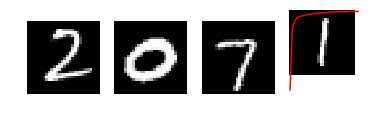

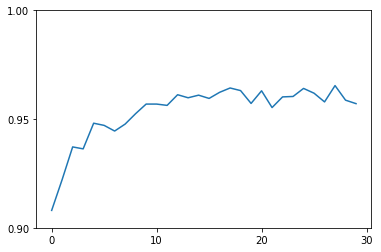

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/home/nasir/dataRsrch/imageDBMain/MNIST/', one_hot=True)

rand_img = np.array([2500, 1001, 100, 500])
for i in range(np.size(rand_img, 0)):
    plt.subplot(1, 4, i+1); plt.axis('off')
    plt.imshow(np.reshape(mnist.train.images[rand_img[i]], [28, 28]), cmap='gray')

print('Training data size : ', mnist.train.images.shape)
print('Training label size: ', mnist.train.labels.shape)
#print(mnist.train.labels[rand_img])

def multi_layer_perceptron_mnist(x, weights, biases):
    hidden_layer1 = tf.add(tf.matmul(x, weights['w_h1']), biases['b_h1'])
    hidden_layer1 = tf.nn.relu(hidden_layer1)
    hidden_layer2 = tf.add(tf.matmul(hidden_layer1, weights['w_h2']), biases['b_h2'])
    hidden_layer2 = tf.nn.relu(hidden_layer2)
    out_layer = tf.add(tf.matmul(hidden_layer2, weights['w_out']), biases['b_out'])  # NO non-linearity in the output layer

    return out_layer


learning_rate = 0.01
num_iter = 30
batch_size = 100
display_step = 10       

# variables
num_input = 784         
num_hidden1 = 128      
num_hidden2 = 256
num_output = 10         

x = tf.placeholder('float', [None, num_input])     # training data
y = tf.placeholder('float', [None, num_output])    # labels

# weights and biases
weights = {
    'w_h1' : tf.Variable(tf.random_normal([num_input, num_hidden1])),       # w1, from input layer to hidden layer 1
    'w_h2' : tf.Variable(tf.random_normal([num_hidden1, num_hidden2])),     # w2, from hidden layer 1 to hidden layer 2
    'w_out': tf.Variable(tf.random_normal([num_hidden2, num_output]))       # w3, from hidden layer 2 to output layer
}
biases = {
    'b_h1' : tf.Variable(tf.random_normal([num_hidden1])),                  # b1, to hidden layer 1 units
    'b_h2' : tf.Variable(tf.random_normal([num_hidden2])),
    'b_out': tf.Variable(tf.random_normal([num_output]))
}

# construct the model
model = multi_layer_perceptron_mnist(x, weights, biases)

# cost function and optimization
loss_func = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss_func)

#%% Train and test

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

cost_all = np.array([])
acc_all = np.array([])
# Train the model
for iter in range(num_iter):
    avg_cost = 0.0
    num_batch = int(mnist.train.num_examples / batch_size)   # total number of batches
    for nB in range(num_batch):
        trainData, trainLabels = mnist.train.next_batch(batch_size=batch_size)
        tmp_cost, _ = sess.run([loss_func, optimizer], feed_dict={x: trainData, y: trainLabels})

        avg_cost = avg_cost + tmp_cost / num_batch

    correct_pred = tf.equal(tf.arg_max(model, 1), tf.arg_max(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, 'float'))
    acc = accuracy.eval(session=sess, feed_dict={x: mnist.test.images, y: mnist.test.labels})

    if iter % display_step == 0:
        print('Epoch: %04d' %(iter+1), 'cost= ' + "{:.5f}".format(avg_cost), 'accuracy: ' + "{:.5f}".format(acc))
    cost_all = np.append(cost_all, avg_cost)
    acc_all = np.append(acc_all, acc)

print('Optimization done...')

x_data = range(num_iter)
plt.plot(x_data, cost_all, color='r')
plt.xticks([0, 10, 20, 30]); plt.yticks([0, 10, 20, 30, 40])
plt.show()

plt.plot(x_data, acc_all)
plt.xticks([0, 10, 20, 30]); plt.yticks([0.9, 0.95, 1.0])
plt.show()

#sess.close()